### Data
Original data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+Disease

Kaggle version: https://www.kaggle.com/ronitf/heart-disease-uci

### Data Dictionary 
Will be specifically using these for EDA:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. thalach - maximum heart rate achieved
5. target -  have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Processing 
from sklearn.preprocessing import StandardScaler

# Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve 


In [2]:
df = pd.read_csv('heart-disease.csv');
df.shape

(303, 14)

## EDA ( Data Exploration )

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
# How many of each class is present
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

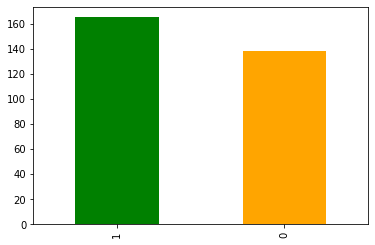

In [5]:
df['target'].value_counts().plot(kind='bar', color=['green', 'orange'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency according to Sex

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

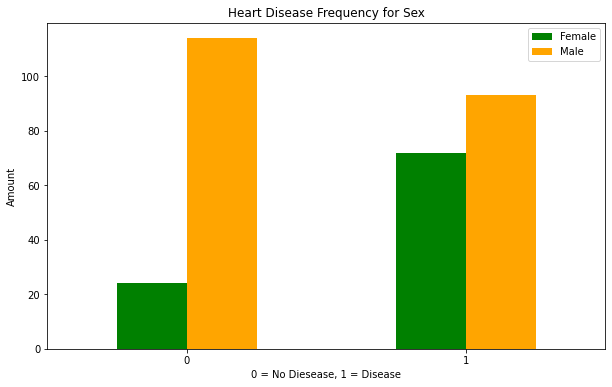

In [9]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['green', 'orange'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [10]:
df['thalach'].value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

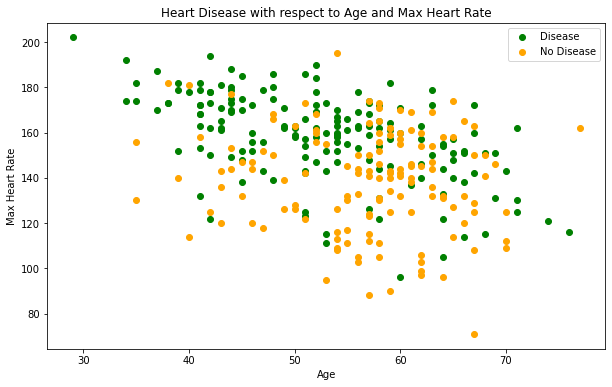

In [11]:
plt.figure(figsize=(10,6))

# Scatter with +ve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c='green');

# Scatter with -ve examples 
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0],
            c='orange')
plt.title('Heart Disease with respect to Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

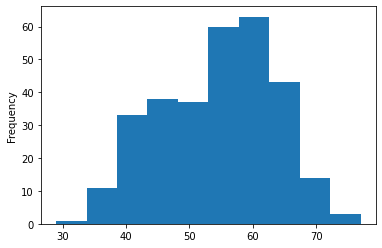

In [12]:
# Check distribution(spread) of age column
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

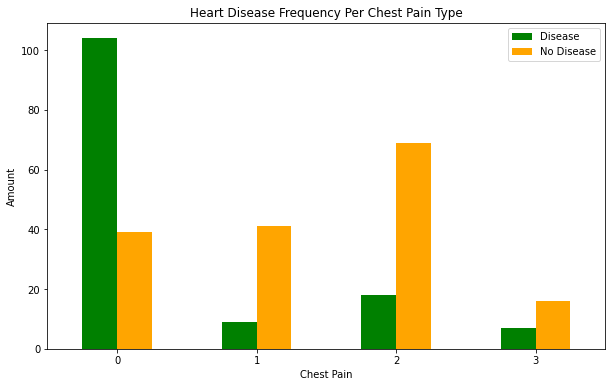

In [13]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['green', 'orange'])
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain')
plt.ylabel('Amount')
plt.legend(['Disease', 'No Disease'])
plt.xticks(rotation=0);

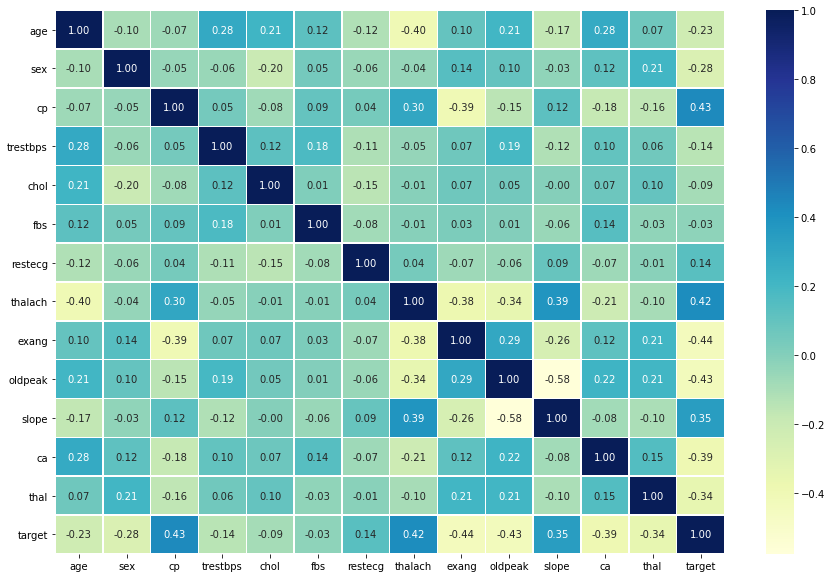

In [14]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt='.2f',
                cmap='YlGnBu');

### Data Processing

In [15]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [16]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])  

## Modelling

In [17]:
df.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   

   cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
0     0     0  ...        0     1     0     0     0     0       0       1   
1     0     0  ...        0     1     0     0     0     0       0       0   
2     0     1  ...        1     1     0     0     0     0       0       0   
3     0     1  ...        1     1     0     0     0     0       0       0   
4     1     0  ...        1     1     0     0     0     0       0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 31 columns]

In [18]:
X = df.drop('target', axis=1)
y = df['target']

In [19]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Function to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [21]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, X_test=X_test,
                             y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8688524590163934}

### Model Comparison

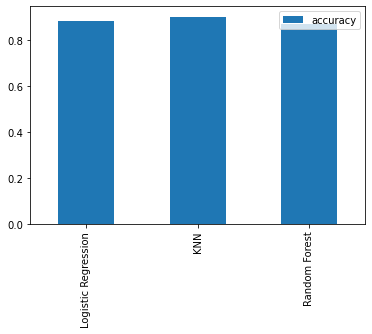

In [22]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Hyperparameter Tuning
1. Tuning KNN


In [23]:
train_scores = [] 
test_scores = []

# List of different values of n_neighbors
neighbors =  range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test)) 

In [24]:
train_scores

[1.0,
 0.871900826446281,
 0.9049586776859504,
 0.8801652892561983,
 0.8760330578512396,
 0.8842975206611571,
 0.8760330578512396,
 0.859504132231405,
 0.859504132231405,
 0.8471074380165289,
 0.8636363636363636,
 0.8471074380165289,
 0.8553719008264463,
 0.8429752066115702,
 0.8181818181818182,
 0.8347107438016529,
 0.8264462809917356,
 0.8181818181818182,
 0.8347107438016529,
 0.8347107438016529]

In [25]:
test_scores

[0.8032786885245902,
 0.819672131147541,
 0.8688524590163934,
 0.8524590163934426,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.9180327868852459,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442]

Maximum KNN Score on Test data: 91.80%


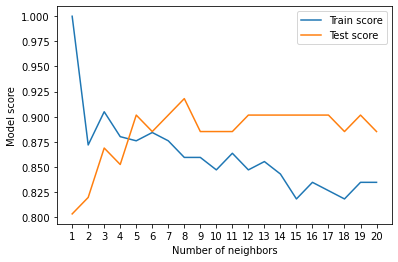

In [26]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN Score on Test data: {max(test_scores)*100:.2f}%")

2. Tune 
    * Logistic Regression
    * Random Forest Classifer
    
... using RandomizedSearchCV

In [27]:
# Hyperparamter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"],
                "penalty": ['l1','l2']}

# Hyperparameter grid for random forest classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

#### Logistic Regression

In [28]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(X_test, y_test)

0.9016393442622951

#### Random Forest Classifier

In [31]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [33]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Evaluating beyond accuracy

### KNN

In [34]:
y_preds = knn.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [35]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

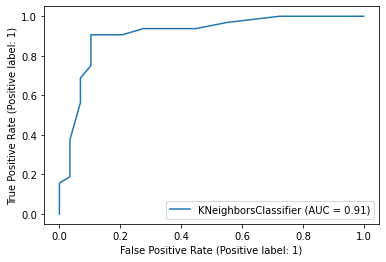

In [36]:
plot_roc_curve(knn, X_test, y_test);

In [37]:
print(confusion_matrix(y_test, y_preds));

[[26  3]
 [ 4 28]]


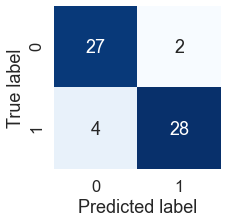

In [54]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False,
                     cmap='Blues',
                     )
    plt.xlabel("Predicted label") 
    plt.ylabel("True label")
plot_conf_mat(y_test, y_preds)

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Logistic regression

In [56]:
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

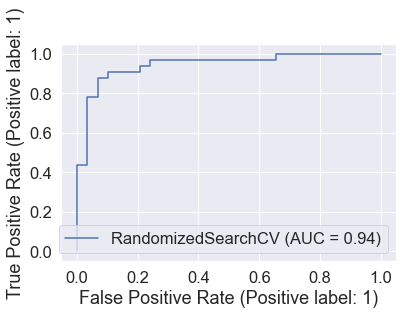

In [58]:
plot_roc_curve(rs_log_reg, X_test, y_test);

In [43]:
print(confusion_matrix(y_test, y_preds))

[[27  2]
 [ 4 28]]


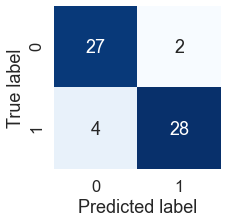

In [44]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False,
                     cmap='Blues',
                     )
    plt.xlabel("Predicted label") 
    plt.ylabel("True label")
plot_conf_mat(y_test, y_preds)

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Cross validation evaluation

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [47]:
# Classfier with best params
clf = LogisticRegression(solver='liblinear',
                         penalty='l2',
                         C=0.23357214690901212)

In [48]:
cv_acc = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=10, 
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8547311827956989

In [49]:
cv_precision = cross_val_score(clf, 
                               X, 
                               y, 
                               cv=10, 
                               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.854162697467651

In [50]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8897058823529413

In [51]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8693062397372742

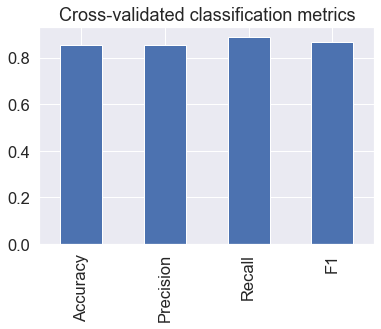

In [52]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);